dogs vs cat

In [1]:
import zipfile, os
from os.path import isfile, isdir
import random
from tqdm import tqdm
import cv2
import numpy as np
# from sklearn.model_selection import train_test_split
# import h5py

img_width = 299
img_height = 299
batch_size = 50
epochs = 8
import keras

# extract train image to folder 'train'
train_path = 'train'
test_path = 'test'
# extract train
if not isdir(train_path):
    zipFile = zipfile.ZipFile(os.path.join(os.getcwd(), 'train.zip'))
    for file in zipFile.namelist():
      zipFile.extract(file, os.getcwd())
    zipFile.close()
# extract test image to folder 'test'
if not isdir('test'):
    zipFile = zipfile.ZipFile(os.path.join(os.getcwd(), 'test.zip'))
    for file in zipFile.namelist():
      zipFile.extract(file, os.getcwd())
    zipFile.close()

C:\Users\thomas_gui\AppData\Local\conda\conda\envs\py36\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
n = 25000
X = np.zeros((n,299,299,3),dtype=np.uint8)
y = np.zeros((n,1),dtype=np.uint8)
for i in tqdm(range(12500)):
    X[i] = cv2.resize(cv2.imread('train/cat/cat.%d.jpg' % i), (299,299))
    X[i+ 12500] = cv2.resize(cv2.imread('train/dog/dog.%d.jpg' % i), (299,299))

y[12500:] =1

# shuffle train_set and split 0.2 portion to validation_set
# set the random seed to make sure the result is fixed every time
np.random.seed(2018)
index = np.arange(len(X))
random.shuffle(index)
# rearrange train_set by index after shuffle
X_shuffle = X[index]
y_shuffle = y[index]
# set the validation split = 0.2
# then split train_set into X_train,X_val, y_train, y_val
splitpoint = int(round(n * 0.8))
(X_train, X_val) = (X_shuffle[:splitpoint], X_shuffle[splitpoint:])
(y_train, y_val) = (y_shuffle[:splitpoint], y_shuffle[splitpoint:])


# preprocess is done, next step is build and fit model.

100%|████████████████████████████████████████████████████████████████████████████| 12500/12500 [02:21<00:00, 88.47it/s]


In [3]:

# define generator manually, yield batchs of train and validation data 
def data_generator(X, y, batch_size): 
    
    datalen = len(y)
    counter = datalen//batch_size
    while (True):
        for i in range(counter):
            yield (X[i * batch_size:(i + 1) * batch_size]-127.5)/127.5, y[i * batch_size:(i + 1) * batch_size]



In [4]:
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Model
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense

# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot
# from keras.utils import plot_model

model_InceptionV3 = InceptionV3(include_top = False, weights = 'imagenet', input_shape = (img_width, img_height,3))
for layer in model_InceptionV3.layers:
    layer.trainable = False
model = GlobalAveragePooling2D() (model_InceptionV3.output)

model = Dropout(0.5)(model)
model = Dense(1, activation='sigmoid')(model)
model_InceptionV3_GAP = Model(model_InceptionV3.input,model, name = 'model_InceptionV3')

# plot_model(model_InceptionV3_GAP, to_file='model_InceptionV3_GAP.png',show_shapes = True) 
# SVG(model_to_dot(model_InceptionV3_GAP).create(prog='dot', format='svg'))

model_InceptionV3_GAP.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

__________________________________________________________________________________________________
mixed0 (Concatenate)            (None, 35, 35, 256)  0           activation_6[0][0]               
                                                                 activation_8[0][0]               
                                                                 activation_11[0][0]              
                                                                 activation_12[0][0]              
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 35, 35, 64)   16384       mixed0[0][0]                     
__________________________________________________________________________________________________
batch_normalization_16 (BatchNo (None, 35, 35, 64)   192         conv2d_16[0][0]                  
__________________________________________________________________________________________________
activation

__________________________________________________________________________________________________
batch_normalization_20 (BatchNo (None, 35, 35, 64)   192         conv2d_20[0][0]                  
__________________________________________________________________________________________________
batch_normalization_22 (BatchNo (None, 35, 35, 64)   192         conv2d_22[0][0]                  
__________________________________________________________________________________________________
batch_normalization_25 (BatchNo (None, 35, 35, 96)   288         conv2d_25[0][0]                  
__________________________________________________________________________________________________
batch_normalization_26 (BatchNo (None, 35, 35, 64)   192         conv2d_26[0][0]                  
__________________________________________________________________________________________________
activation_20 (Activation)      (None, 35, 35, 64)   0           batch_normalization_20[0][0]     
__________

batch_normalization_38 (BatchNo (None, 17, 17, 128)  384         conv2d_38[0][0]                  
__________________________________________________________________________________________________
activation_33 (Activation)      (None, 17, 17, 128)  0           batch_normalization_33[0][0]     
__________________________________________________________________________________________________
activation_38 (Activation)      (None, 17, 17, 128)  0           batch_normalization_38[0][0]     
__________________________________________________________________________________________________
average_pooling2d_4 (AveragePoo (None, 17, 17, 768)  0           mixed3[0][0]                     
__________________________________________________________________________________________________
conv2d_31 (Conv2D)              (None, 17, 17, 192)  147456      mixed3[0][0]                     
__________________________________________________________________________________________________
conv2d_34 

__________________________________________________________________________________________________
batch_normalization_41 (BatchNo (None, 17, 17, 192)  576         conv2d_41[0][0]                  
__________________________________________________________________________________________________
batch_normalization_44 (BatchNo (None, 17, 17, 192)  576         conv2d_44[0][0]                  
__________________________________________________________________________________________________
batch_normalization_49 (BatchNo (None, 17, 17, 192)  576         conv2d_49[0][0]                  
__________________________________________________________________________________________________
batch_normalization_50 (BatchNo (None, 17, 17, 192)  576         conv2d_50[0][0]                  
__________________________________________________________________________________________________
activation_41 (Activation)      (None, 17, 17, 192)  0           batch_normalization_41[0][0]     
__________

activation_60 (Activation)      (None, 17, 17, 192)  0           batch_normalization_60[0][0]     
__________________________________________________________________________________________________
mixed6 (Concatenate)            (None, 17, 17, 768)  0           activation_51[0][0]              
                                                                 activation_54[0][0]              
                                                                 activation_59[0][0]              
                                                                 activation_60[0][0]              
__________________________________________________________________________________________________
conv2d_65 (Conv2D)              (None, 17, 17, 192)  147456      mixed6[0][0]                     
__________________________________________________________________________________________________
batch_normalization_65 (BatchNo (None, 17, 17, 192)  576         conv2d_65[0][0]                  
__________

batch_normalization_74 (BatchNo (None, 17, 17, 192)  576         conv2d_74[0][0]                  
__________________________________________________________________________________________________
activation_74 (Activation)      (None, 17, 17, 192)  0           batch_normalization_74[0][0]     
__________________________________________________________________________________________________
conv2d_71 (Conv2D)              (None, 17, 17, 192)  147456      mixed7[0][0]                     
__________________________________________________________________________________________________
conv2d_75 (Conv2D)              (None, 17, 17, 192)  258048      activation_74[0][0]              
__________________________________________________________________________________________________
batch_normalization_71 (BatchNo (None, 17, 17, 192)  576         conv2d_71[0][0]                  
__________________________________________________________________________________________________
batch_norm

activation_84 (Activation)      (None, 8, 8, 384)    0           batch_normalization_84[0][0]     
__________________________________________________________________________________________________
batch_normalization_85 (BatchNo (None, 8, 8, 192)    576         conv2d_85[0][0]                  
__________________________________________________________________________________________________
activation_77 (Activation)      (None, 8, 8, 320)    0           batch_normalization_77[0][0]     
__________________________________________________________________________________________________
mixed9_0 (Concatenate)          (None, 8, 8, 768)    0           activation_79[0][0]              
                                                                 activation_80[0][0]              
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 8, 8, 768)    0           activation_83[0][0]              
          

                                                                 mixed9_1[0][0]                   
                                                                 concatenate_2[0][0]              
                                                                 activation_94[0][0]              
__________________________________________________________________________________________________
global_average_pooling2d_1 (Glo (None, 2048)         0           mixed10[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 2048)         0           global_average_pooling2d_1[0][0] 
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 1)            2049        dropout_1[0][0]                  
Total params: 21,804,833
Trainable params: 2,049
Non-trainable params: 21,802,784
___________________________

In [5]:
# from keras.preprocessing.image import ImageDataGenerator

model_InceptionV3_GAP.compile(loss = 'binary_crossentropy', optimizer = 'Adadelta', metrics =['accuracy'])
model_history = model_InceptionV3_GAP.fit_generator(data_generator(X_train, y_train, batch_size=batch_size),
                                                    steps_per_epoch=len(y_train)//batch_size, epochs=epochs,
                                                    validation_data = data_generator(X_val, y_val, batch_size=batch_size),
                                                    validation_steps=len(y_val)//batch_size,
                                                    verbose=1)


Epoch 1/8


204/400 [==============>...............] - ETA: 27:41 - loss: 0.6872 - acc: 0.58 - ETA: 15:22 - loss: 0.7015 - acc: 0.57 - ETA: 11:13 - loss: 0.6684 - acc: 0.59 - ETA: 9:10 - loss: 0.6983 - acc: 0.5750 - ETA: 7:55 - loss: 0.6989 - acc: 0.584 - ETA: 7:05 - loss: 0.6826 - acc: 0.603 - ETA: 6:29 - loss: 0.6624 - acc: 0.622 - ETA: 6:02 - loss: 0.6598 - acc: 0.615 - ETA: 5:41 - loss: 0.6411 - acc: 0.635 - ETA: 5:23 - loss: 0.6325 - acc: 0.642 - ETA: 5:10 - loss: 0.6235 - acc: 0.649 - ETA: 4:58 - loss: 0.6187 - acc: 0.655 - ETA: 4:48 - loss: 0.6084 - acc: 0.663 - ETA: 4:39 - loss: 0.5965 - acc: 0.677 - ETA: 4:31 - loss: 0.5912 - acc: 0.682 - ETA: 4:25 - loss: 0.5791 - acc: 0.690 - ETA: 4:19 - loss: 0.5752 - acc: 0.694 - ETA: 4:13 - loss: 0.5670 - acc: 0.704 - ETA: 4:09 - loss: 0.5589 - acc: 0.713 - ETA: 4:04 - loss: 0.5516 - acc: 0.717 - ETA: 4:00 - loss: 0.5442 - acc: 0.722 - ETA: 3:57 - loss: 0.5376 - acc: 0.730 - ETA: 3:53 - loss: 0.5376 - acc: 0.730 - ETA: 3:50 - loss: 0.5360 - acc: 0.73

400/400 [==============================] - ETA: 1:35 - loss: 0.2530 - acc: 0.910 - ETA: 1:34 - loss: 0.2523 - acc: 0.910 - ETA: 1:34 - loss: 0.2517 - acc: 0.910 - ETA: 1:33 - loss: 0.2516 - acc: 0.910 - ETA: 1:33 - loss: 0.2512 - acc: 0.910 - ETA: 1:32 - loss: 0.2506 - acc: 0.911 - ETA: 1:32 - loss: 0.2503 - acc: 0.911 - ETA: 1:31 - loss: 0.2500 - acc: 0.910 - ETA: 1:31 - loss: 0.2496 - acc: 0.911 - ETA: 1:30 - loss: 0.2497 - acc: 0.911 - ETA: 1:30 - loss: 0.2492 - acc: 0.911 - ETA: 1:29 - loss: 0.2486 - acc: 0.911 - ETA: 1:29 - loss: 0.2479 - acc: 0.912 - ETA: 1:28 - loss: 0.2470 - acc: 0.912 - ETA: 1:28 - loss: 0.2466 - acc: 0.912 - ETA: 1:27 - loss: 0.2463 - acc: 0.912 - ETA: 1:27 - loss: 0.2458 - acc: 0.912 - ETA: 1:26 - loss: 0.2453 - acc: 0.913 - ETA: 1:26 - loss: 0.2447 - acc: 0.913 - ETA: 1:25 - loss: 0.2442 - acc: 0.913 - ETA: 1:25 - loss: 0.2437 - acc: 0.913 - ETA: 1:24 - loss: 0.2435 - acc: 0.913 - ETA: 1:24 - loss: 0.2432 - acc: 0.913 - ETA: 1:23 - loss: 0.2434 - acc: 0.913

204/400 [==============>...............] - ETA: 3:24 - loss: 0.2356 - acc: 0.880 - ETA: 3:22 - loss: 0.1753 - acc: 0.910 - ETA: 3:22 - loss: 0.1779 - acc: 0.920 - ETA: 3:20 - loss: 0.1679 - acc: 0.920 - ETA: 3:18 - loss: 0.1641 - acc: 0.924 - ETA: 3:19 - loss: 0.1479 - acc: 0.933 - ETA: 3:18 - loss: 0.1582 - acc: 0.928 - ETA: 3:18 - loss: 0.1504 - acc: 0.932 - ETA: 3:16 - loss: 0.1441 - acc: 0.935 - ETA: 3:16 - loss: 0.1476 - acc: 0.936 - ETA: 3:15 - loss: 0.1432 - acc: 0.938 - ETA: 3:13 - loss: 0.1423 - acc: 0.938 - ETA: 3:12 - loss: 0.1406 - acc: 0.938 - ETA: 3:11 - loss: 0.1363 - acc: 0.941 - ETA: 3:10 - loss: 0.1405 - acc: 0.941 - ETA: 3:09 - loss: 0.1362 - acc: 0.943 - ETA: 3:08 - loss: 0.1385 - acc: 0.942 - ETA: 3:07 - loss: 0.1372 - acc: 0.943 - ETA: 3:06 - loss: 0.1402 - acc: 0.942 - ETA: 3:06 - loss: 0.1362 - acc: 0.945 - ETA: 3:05 - loss: 0.1334 - acc: 0.945 - ETA: 3:04 - loss: 0.1334 - acc: 0.946 - ETA: 3:03 - loss: 0.1374 - acc: 0.945 - ETA: 3:02 - loss: 0.1397 - acc: 0.945

400/400 [==============================] - ETA: 1:33 - loss: 0.1202 - acc: 0.954 - ETA: 1:33 - loss: 0.1201 - acc: 0.954 - ETA: 1:33 - loss: 0.1200 - acc: 0.954 - ETA: 1:32 - loss: 0.1200 - acc: 0.954 - ETA: 1:32 - loss: 0.1201 - acc: 0.954 - ETA: 1:31 - loss: 0.1199 - acc: 0.954 - ETA: 1:31 - loss: 0.1198 - acc: 0.954 - ETA: 1:30 - loss: 0.1197 - acc: 0.954 - ETA: 1:30 - loss: 0.1199 - acc: 0.954 - ETA: 1:29 - loss: 0.1204 - acc: 0.954 - ETA: 1:29 - loss: 0.1202 - acc: 0.954 - ETA: 1:28 - loss: 0.1201 - acc: 0.954 - ETA: 1:28 - loss: 0.1199 - acc: 0.954 - ETA: 1:27 - loss: 0.1197 - acc: 0.954 - ETA: 1:27 - loss: 0.1199 - acc: 0.954 - ETA: 1:26 - loss: 0.1200 - acc: 0.954 - ETA: 1:26 - loss: 0.1199 - acc: 0.954 - ETA: 1:25 - loss: 0.1198 - acc: 0.955 - ETA: 1:25 - loss: 0.1197 - acc: 0.955 - ETA: 1:24 - loss: 0.1197 - acc: 0.955 - ETA: 1:24 - loss: 0.1197 - acc: 0.955 - ETA: 1:23 - loss: 0.1199 - acc: 0.955 - ETA: 1:23 - loss: 0.1199 - acc: 0.955 - ETA: 1:22 - loss: 0.1202 - acc: 0.954

204/400 [==============>...............] - ETA: 3:21 - loss: 0.1800 - acc: 0.940 - ETA: 3:16 - loss: 0.1411 - acc: 0.960 - ETA: 3:14 - loss: 0.1342 - acc: 0.960 - ETA: 3:13 - loss: 0.1231 - acc: 0.960 - ETA: 3:13 - loss: 0.1257 - acc: 0.956 - ETA: 3:13 - loss: 0.1121 - acc: 0.963 - ETA: 3:12 - loss: 0.1184 - acc: 0.960 - ETA: 3:12 - loss: 0.1103 - acc: 0.962 - ETA: 3:11 - loss: 0.1033 - acc: 0.966 - ETA: 3:10 - loss: 0.1034 - acc: 0.966 - ETA: 3:10 - loss: 0.1006 - acc: 0.967 - ETA: 3:08 - loss: 0.1058 - acc: 0.965 - ETA: 3:07 - loss: 0.1096 - acc: 0.964 - ETA: 3:07 - loss: 0.1066 - acc: 0.965 - ETA: 3:06 - loss: 0.1133 - acc: 0.964 - ETA: 3:06 - loss: 0.1075 - acc: 0.966 - ETA: 3:05 - loss: 0.1053 - acc: 0.967 - ETA: 3:05 - loss: 0.1045 - acc: 0.966 - ETA: 3:04 - loss: 0.1089 - acc: 0.964 - ETA: 3:03 - loss: 0.1061 - acc: 0.966 - ETA: 3:02 - loss: 0.1040 - acc: 0.967 - ETA: 3:02 - loss: 0.1033 - acc: 0.967 - ETA: 3:02 - loss: 0.1085 - acc: 0.963 - ETA: 3:02 - loss: 0.1107 - acc: 0.962

400/400 [==============================] - ETA: 1:34 - loss: 0.1045 - acc: 0.961 - ETA: 1:34 - loss: 0.1044 - acc: 0.961 - ETA: 1:33 - loss: 0.1041 - acc: 0.961 - ETA: 1:33 - loss: 0.1039 - acc: 0.961 - ETA: 1:33 - loss: 0.1037 - acc: 0.961 - ETA: 1:32 - loss: 0.1035 - acc: 0.961 - ETA: 1:32 - loss: 0.1034 - acc: 0.961 - ETA: 1:31 - loss: 0.1036 - acc: 0.961 - ETA: 1:31 - loss: 0.1039 - acc: 0.961 - ETA: 1:30 - loss: 0.1045 - acc: 0.961 - ETA: 1:30 - loss: 0.1045 - acc: 0.961 - ETA: 1:29 - loss: 0.1043 - acc: 0.961 - ETA: 1:29 - loss: 0.1041 - acc: 0.961 - ETA: 1:28 - loss: 0.1038 - acc: 0.961 - ETA: 1:28 - loss: 0.1040 - acc: 0.961 - ETA: 1:27 - loss: 0.1044 - acc: 0.960 - ETA: 1:27 - loss: 0.1045 - acc: 0.960 - ETA: 1:26 - loss: 0.1044 - acc: 0.960 - ETA: 1:26 - loss: 0.1042 - acc: 0.960 - ETA: 1:25 - loss: 0.1041 - acc: 0.961 - ETA: 1:25 - loss: 0.1041 - acc: 0.961 - ETA: 1:24 - loss: 0.1040 - acc: 0.961 - ETA: 1:24 - loss: 0.1040 - acc: 0.961 - ETA: 1:23 - loss: 0.1044 - acc: 0.960

204/400 [==============>...............] - ETA: 3:12 - loss: 0.1465 - acc: 0.920 - ETA: 3:13 - loss: 0.1360 - acc: 0.930 - ETA: 3:12 - loss: 0.1533 - acc: 0.933 - ETA: 3:11 - loss: 0.1482 - acc: 0.930 - ETA: 3:11 - loss: 0.1362 - acc: 0.940 - ETA: 3:10 - loss: 0.1235 - acc: 0.943 - ETA: 3:10 - loss: 0.1282 - acc: 0.942 - ETA: 3:09 - loss: 0.1183 - acc: 0.947 - ETA: 3:09 - loss: 0.1136 - acc: 0.951 - ETA: 3:09 - loss: 0.1131 - acc: 0.950 - ETA: 3:09 - loss: 0.1099 - acc: 0.950 - ETA: 3:08 - loss: 0.1095 - acc: 0.951 - ETA: 3:07 - loss: 0.1106 - acc: 0.952 - ETA: 3:07 - loss: 0.1108 - acc: 0.952 - ETA: 3:06 - loss: 0.1156 - acc: 0.950 - ETA: 3:06 - loss: 0.1099 - acc: 0.953 - ETA: 3:05 - loss: 0.1063 - acc: 0.955 - ETA: 3:04 - loss: 0.1062 - acc: 0.955 - ETA: 3:04 - loss: 0.1090 - acc: 0.951 - ETA: 3:04 - loss: 0.1047 - acc: 0.954 - ETA: 3:03 - loss: 0.1022 - acc: 0.955 - ETA: 3:03 - loss: 0.1014 - acc: 0.956 - ETA: 3:02 - loss: 0.1036 - acc: 0.954 - ETA: 3:02 - loss: 0.1049 - acc: 0.954

400/400 [==============================] - ETA: 1:33 - loss: 0.1036 - acc: 0.961 - ETA: 1:33 - loss: 0.1035 - acc: 0.961 - ETA: 1:32 - loss: 0.1035 - acc: 0.961 - ETA: 1:32 - loss: 0.1034 - acc: 0.961 - ETA: 1:31 - loss: 0.1035 - acc: 0.961 - ETA: 1:31 - loss: 0.1033 - acc: 0.961 - ETA: 1:30 - loss: 0.1031 - acc: 0.961 - ETA: 1:30 - loss: 0.1033 - acc: 0.960 - ETA: 1:29 - loss: 0.1039 - acc: 0.960 - ETA: 1:29 - loss: 0.1043 - acc: 0.960 - ETA: 1:28 - loss: 0.1040 - acc: 0.960 - ETA: 1:28 - loss: 0.1039 - acc: 0.960 - ETA: 1:27 - loss: 0.1040 - acc: 0.960 - ETA: 1:27 - loss: 0.1036 - acc: 0.960 - ETA: 1:26 - loss: 0.1036 - acc: 0.960 - ETA: 1:26 - loss: 0.1035 - acc: 0.960 - ETA: 1:25 - loss: 0.1033 - acc: 0.960 - ETA: 1:25 - loss: 0.1032 - acc: 0.961 - ETA: 1:25 - loss: 0.1032 - acc: 0.961 - ETA: 1:24 - loss: 0.1033 - acc: 0.961 - ETA: 1:24 - loss: 0.1030 - acc: 0.961 - ETA: 1:23 - loss: 0.1031 - acc: 0.961 - ETA: 1:23 - loss: 0.1032 - acc: 0.961 - ETA: 1:22 - loss: 0.1031 - acc: 0.961

204/400 [==============>...............] - ETA: 3:21 - loss: 0.1910 - acc: 0.920 - ETA: 3:19 - loss: 0.1297 - acc: 0.950 - ETA: 3:18 - loss: 0.1172 - acc: 0.953 - ETA: 3:16 - loss: 0.1031 - acc: 0.955 - ETA: 3:16 - loss: 0.0976 - acc: 0.956 - ETA: 3:15 - loss: 0.0884 - acc: 0.963 - ETA: 3:14 - loss: 0.0950 - acc: 0.957 - ETA: 3:13 - loss: 0.0872 - acc: 0.960 - ETA: 3:13 - loss: 0.0858 - acc: 0.960 - ETA: 3:12 - loss: 0.0893 - acc: 0.960 - ETA: 3:12 - loss: 0.0849 - acc: 0.963 - ETA: 3:11 - loss: 0.0878 - acc: 0.963 - ETA: 3:10 - loss: 0.0874 - acc: 0.963 - ETA: 3:10 - loss: 0.0873 - acc: 0.962 - ETA: 3:09 - loss: 0.0920 - acc: 0.964 - ETA: 3:08 - loss: 0.0895 - acc: 0.965 - ETA: 3:07 - loss: 0.0884 - acc: 0.965 - ETA: 3:07 - loss: 0.0878 - acc: 0.965 - ETA: 3:06 - loss: 0.0918 - acc: 0.964 - ETA: 3:05 - loss: 0.0893 - acc: 0.966 - ETA: 3:05 - loss: 0.0869 - acc: 0.967 - ETA: 3:04 - loss: 0.0897 - acc: 0.967 - ETA: 3:03 - loss: 0.0926 - acc: 0.965 - ETA: 3:03 - loss: 0.0957 - acc: 0.963

400/400 [==============================] - ETA: 1:34 - loss: 0.0945 - acc: 0.964 - ETA: 1:33 - loss: 0.0944 - acc: 0.964 - ETA: 1:33 - loss: 0.0942 - acc: 0.964 - ETA: 1:32 - loss: 0.0943 - acc: 0.964 - ETA: 1:32 - loss: 0.0946 - acc: 0.964 - ETA: 1:31 - loss: 0.0945 - acc: 0.964 - ETA: 1:31 - loss: 0.0943 - acc: 0.964 - ETA: 1:30 - loss: 0.0942 - acc: 0.964 - ETA: 1:30 - loss: 0.0945 - acc: 0.964 - ETA: 1:30 - loss: 0.0948 - acc: 0.964 - ETA: 1:29 - loss: 0.0946 - acc: 0.964 - ETA: 1:29 - loss: 0.0944 - acc: 0.964 - ETA: 1:28 - loss: 0.0943 - acc: 0.964 - ETA: 1:28 - loss: 0.0941 - acc: 0.964 - ETA: 1:27 - loss: 0.0942 - acc: 0.964 - ETA: 1:27 - loss: 0.0944 - acc: 0.964 - ETA: 1:26 - loss: 0.0943 - acc: 0.964 - ETA: 1:26 - loss: 0.0941 - acc: 0.964 - ETA: 1:25 - loss: 0.0939 - acc: 0.964 - ETA: 1:25 - loss: 0.0938 - acc: 0.964 - ETA: 1:24 - loss: 0.0937 - acc: 0.964 - ETA: 1:24 - loss: 0.0941 - acc: 0.964 - ETA: 1:23 - loss: 0.0940 - acc: 0.964 - ETA: 1:23 - loss: 0.0949 - acc: 0.964

204/400 [==============>...............] - ETA: 3:20 - loss: 0.2016 - acc: 0.920 - ETA: 3:16 - loss: 0.1578 - acc: 0.920 - ETA: 3:14 - loss: 0.1286 - acc: 0.933 - ETA: 3:14 - loss: 0.1124 - acc: 0.940 - ETA: 3:13 - loss: 0.1028 - acc: 0.944 - ETA: 3:14 - loss: 0.0906 - acc: 0.953 - ETA: 3:14 - loss: 0.1060 - acc: 0.951 - ETA: 3:14 - loss: 0.0956 - acc: 0.957 - ETA: 3:13 - loss: 0.0955 - acc: 0.960 - ETA: 3:12 - loss: 0.0935 - acc: 0.960 - ETA: 3:12 - loss: 0.0939 - acc: 0.960 - ETA: 3:11 - loss: 0.1037 - acc: 0.958 - ETA: 3:10 - loss: 0.1036 - acc: 0.958 - ETA: 3:09 - loss: 0.1014 - acc: 0.958 - ETA: 3:09 - loss: 0.1096 - acc: 0.956 - ETA: 3:07 - loss: 0.1053 - acc: 0.957 - ETA: 3:07 - loss: 0.1029 - acc: 0.958 - ETA: 3:06 - loss: 0.1008 - acc: 0.958 - ETA: 3:06 - loss: 0.1007 - acc: 0.960 - ETA: 3:05 - loss: 0.0973 - acc: 0.962 - ETA: 3:04 - loss: 0.0939 - acc: 0.963 - ETA: 3:04 - loss: 0.0936 - acc: 0.963 - ETA: 3:03 - loss: 0.0946 - acc: 0.964 - ETA: 3:02 - loss: 0.0928 - acc: 0.965

400/400 [==============================] - ETA: 1:33 - loss: 0.0966 - acc: 0.963 - ETA: 1:33 - loss: 0.0965 - acc: 0.963 - ETA: 1:32 - loss: 0.0963 - acc: 0.963 - ETA: 1:32 - loss: 0.0963 - acc: 0.963 - ETA: 1:31 - loss: 0.0963 - acc: 0.962 - ETA: 1:31 - loss: 0.0962 - acc: 0.962 - ETA: 1:31 - loss: 0.0961 - acc: 0.962 - ETA: 1:30 - loss: 0.0963 - acc: 0.962 - ETA: 1:30 - loss: 0.0967 - acc: 0.962 - ETA: 1:29 - loss: 0.0969 - acc: 0.962 - ETA: 1:29 - loss: 0.0967 - acc: 0.962 - ETA: 1:28 - loss: 0.0965 - acc: 0.963 - ETA: 1:28 - loss: 0.0964 - acc: 0.962 - ETA: 1:27 - loss: 0.0962 - acc: 0.963 - ETA: 1:27 - loss: 0.0964 - acc: 0.962 - ETA: 1:26 - loss: 0.0961 - acc: 0.963 - ETA: 1:26 - loss: 0.0963 - acc: 0.963 - ETA: 1:25 - loss: 0.0961 - acc: 0.963 - ETA: 1:25 - loss: 0.0959 - acc: 0.963 - ETA: 1:24 - loss: 0.0957 - acc: 0.963 - ETA: 1:24 - loss: 0.0954 - acc: 0.963 - ETA: 1:23 - loss: 0.0954 - acc: 0.963 - ETA: 1:23 - loss: 0.0953 - acc: 0.963 - ETA: 1:22 - loss: 0.0953 - acc: 0.963

204/400 [==============>...............] - ETA: 3:15 - loss: 0.2139 - acc: 0.940 - ETA: 3:13 - loss: 0.1522 - acc: 0.960 - ETA: 3:12 - loss: 0.1496 - acc: 0.946 - ETA: 3:12 - loss: 0.1439 - acc: 0.945 - ETA: 3:11 - loss: 0.1284 - acc: 0.948 - ETA: 3:11 - loss: 0.1112 - acc: 0.956 - ETA: 3:11 - loss: 0.1181 - acc: 0.951 - ETA: 3:10 - loss: 0.1074 - acc: 0.957 - ETA: 3:10 - loss: 0.1048 - acc: 0.957 - ETA: 3:10 - loss: 0.1028 - acc: 0.960 - ETA: 3:09 - loss: 0.1032 - acc: 0.960 - ETA: 3:08 - loss: 0.1155 - acc: 0.955 - ETA: 3:07 - loss: 0.1135 - acc: 0.953 - ETA: 3:06 - loss: 0.1080 - acc: 0.957 - ETA: 3:06 - loss: 0.1079 - acc: 0.957 - ETA: 3:05 - loss: 0.1056 - acc: 0.957 - ETA: 3:05 - loss: 0.1051 - acc: 0.955 - ETA: 3:04 - loss: 0.1075 - acc: 0.955 - ETA: 3:03 - loss: 0.1088 - acc: 0.953 - ETA: 3:03 - loss: 0.1054 - acc: 0.956 - ETA: 3:02 - loss: 0.1037 - acc: 0.956 - ETA: 3:02 - loss: 0.1034 - acc: 0.956 - ETA: 3:01 - loss: 0.1077 - acc: 0.954 - ETA: 3:01 - loss: 0.1064 - acc: 0.955

400/400 [==============================] - ETA: 1:34 - loss: 0.0945 - acc: 0.962 - ETA: 1:33 - loss: 0.0948 - acc: 0.962 - ETA: 1:33 - loss: 0.0946 - acc: 0.962 - ETA: 1:32 - loss: 0.0945 - acc: 0.962 - ETA: 1:32 - loss: 0.0944 - acc: 0.962 - ETA: 1:31 - loss: 0.0944 - acc: 0.962 - ETA: 1:31 - loss: 0.0941 - acc: 0.962 - ETA: 1:30 - loss: 0.0943 - acc: 0.962 - ETA: 1:30 - loss: 0.0951 - acc: 0.961 - ETA: 1:29 - loss: 0.0953 - acc: 0.961 - ETA: 1:29 - loss: 0.0951 - acc: 0.961 - ETA: 1:28 - loss: 0.0949 - acc: 0.961 - ETA: 1:28 - loss: 0.0950 - acc: 0.961 - ETA: 1:27 - loss: 0.0946 - acc: 0.961 - ETA: 1:27 - loss: 0.0946 - acc: 0.961 - ETA: 1:26 - loss: 0.0946 - acc: 0.961 - ETA: 1:26 - loss: 0.0947 - acc: 0.961 - ETA: 1:26 - loss: 0.0944 - acc: 0.962 - ETA: 1:25 - loss: 0.0941 - acc: 0.962 - ETA: 1:25 - loss: 0.0943 - acc: 0.962 - ETA: 1:24 - loss: 0.0940 - acc: 0.962 - ETA: 1:24 - loss: 0.0942 - acc: 0.961 - ETA: 1:23 - loss: 0.0941 - acc: 0.961 - ETA: 1:23 - loss: 0.0942 - acc: 0.961

204/400 [==============>...............] - ETA: 3:24 - loss: 0.1565 - acc: 0.940 - ETA: 3:18 - loss: 0.1030 - acc: 0.970 - ETA: 3:16 - loss: 0.1115 - acc: 0.960 - ETA: 3:15 - loss: 0.1165 - acc: 0.945 - ETA: 3:15 - loss: 0.1010 - acc: 0.956 - ETA: 3:14 - loss: 0.0916 - acc: 0.960 - ETA: 3:14 - loss: 0.1030 - acc: 0.954 - ETA: 3:13 - loss: 0.0985 - acc: 0.957 - ETA: 3:12 - loss: 0.1004 - acc: 0.957 - ETA: 3:12 - loss: 0.0996 - acc: 0.960 - ETA: 3:11 - loss: 0.0915 - acc: 0.963 - ETA: 3:10 - loss: 0.0907 - acc: 0.963 - ETA: 3:09 - loss: 0.0944 - acc: 0.963 - ETA: 3:08 - loss: 0.0928 - acc: 0.962 - ETA: 3:08 - loss: 0.1039 - acc: 0.961 - ETA: 3:08 - loss: 0.0990 - acc: 0.963 - ETA: 3:07 - loss: 0.0975 - acc: 0.964 - ETA: 3:07 - loss: 0.0975 - acc: 0.965 - ETA: 3:06 - loss: 0.1001 - acc: 0.963 - ETA: 3:06 - loss: 0.0965 - acc: 0.965 - ETA: 3:05 - loss: 0.0934 - acc: 0.965 - ETA: 3:04 - loss: 0.0925 - acc: 0.965 - ETA: 3:04 - loss: 0.0965 - acc: 0.962 - ETA: 3:03 - loss: 0.0981 - acc: 0.960

400/400 [==============================] - ETA: 1:33 - loss: 0.0926 - acc: 0.964 - ETA: 1:33 - loss: 0.0925 - acc: 0.964 - ETA: 1:32 - loss: 0.0923 - acc: 0.964 - ETA: 1:32 - loss: 0.0921 - acc: 0.964 - ETA: 1:31 - loss: 0.0922 - acc: 0.964 - ETA: 1:31 - loss: 0.0924 - acc: 0.964 - ETA: 1:30 - loss: 0.0922 - acc: 0.964 - ETA: 1:30 - loss: 0.0925 - acc: 0.964 - ETA: 1:29 - loss: 0.0929 - acc: 0.964 - ETA: 1:29 - loss: 0.0930 - acc: 0.963 - ETA: 1:28 - loss: 0.0930 - acc: 0.963 - ETA: 1:28 - loss: 0.0931 - acc: 0.963 - ETA: 1:27 - loss: 0.0929 - acc: 0.963 - ETA: 1:27 - loss: 0.0928 - acc: 0.963 - ETA: 1:27 - loss: 0.0929 - acc: 0.963 - ETA: 1:26 - loss: 0.0932 - acc: 0.963 - ETA: 1:26 - loss: 0.0930 - acc: 0.963 - ETA: 1:25 - loss: 0.0929 - acc: 0.964 - ETA: 1:25 - loss: 0.0929 - acc: 0.964 - ETA: 1:24 - loss: 0.0931 - acc: 0.963 - ETA: 1:24 - loss: 0.0930 - acc: 0.963 - ETA: 1:23 - loss: 0.0931 - acc: 0.963 - ETA: 1:23 - loss: 0.0930 - acc: 0.963 - ETA: 1:22 - loss: 0.0937 - acc: 0.963

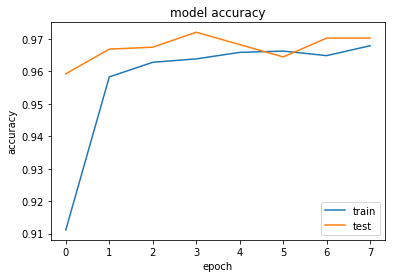

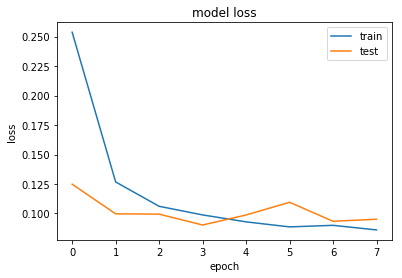

In [6]:
from matplotlib import pyplot as plt  
history=model_history  
# summarize history for accuracy
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.grid()
plt.legend(['train', 'test'], loc='lower right')  
plt.show()  
# summarize history for loss  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.grid()
plt.legend(['train', 'test'], loc='upper right')  
plt.show()  

In [35]:

# make prediction
# here is a trick to process log-loss result
n_test = 12500
X_test = np.zeros((n_test,299,299,3),dtype=np.uint8)
for i in tqdm(range(12500)):
    j = i+1
    X_test[i] = cv2.resize(cv2.imread('test/%d.jpg' % j), (299,299))


100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [00:58<00:00, 212.37it/s]


MemoryError: 

In [42]:

def test_generator(X, batch_size): 
    datalen = len(X)
    counter = datalen//batch_size
    while (True):
        for i in range(counter):
            yield X[i * batch_size:(i + 1) * batch_size]/255.0

predictions = model_InceptionV3_GAP.predict_generator(test_generator(X_test,100),steps=125, verbose=1)

125/125 [==============================] - ETA: 4: - ETA: 3: - ETA: 3: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 59s - ETA: 58 - ETA: 57 - ETA: 56 - ETA: 55 - ETA: 54 - ETA: 53 - ETA: 52 - ETA: 51 - ETA: 50 - ETA: 49 - ETA: 48 - ETA: 47 - ETA: 46 - ETA: 45 - ETA: 43 - ETA: 42 - ETA: 41 - ETA: 40 - ETA: 39 - ETA: 38 - ETA: 37 - ETA: 36 - ETA: 35 - ETA: 34 - ETA: 33 - ETA: 32 - ETA: 31 - ETA: 3

In [45]:
predictions = predictions.clip(min=0.005,max=0.995)
output = pd.read_csv('sample_submission.csv')
print(len(predictions))
output.label = predictions
output.to_csv('predictions.csv',index=None)

12500


In [48]:
import keras
print(keras.__version__)

2.1.2
